In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
display(df.head())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Make a copy of the datasetwith which to work with
bitcoin_df = df.copy()

In [9]:
# check the datatype to be sure they are in the right format for time series forecasting
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [10]:
# lets convert the time stamp column into a datetime format
bitcoin_df['Timestamp'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s', infer_datetime_format=True)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
Timestamp            datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 279.1 MB


In [11]:
# check for the sum of missing values in each column in the dataset
bitcoin_df.isnull().sum()

Timestamp                  0
Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

In [12]:
# fill the missing values with the previous values 
bitcoin_df = bitcoin_df.ffill(axis=0)
display(bitcoin_df.head())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [13]:
bitcoin_df.shape

(4572257, 8)

In [14]:
# Now lets describe our data and also know the shape
round(bitcoin_df.describe(), 2)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4572257.00,4572257.00,4572257.00,4572257.00,4572257.00,4572257.00,4572257.00
mean,3077.54,3079.63,3075.32,3077.51,9.70,22674.18,3077.51
std,3905.41,3908.46,3902.10,3905.35,31.43,92347.29,3905.36
min,3.80,3.80,1.50,1.50,0.00,0.00,3.80
25%,237.00,237.06,236.92,237.00,0.39,126.14,237.00
50%,632.48,632.83,632.00,632.45,1.98,1061.02,632.43
75%,6409.23,6410.82,6407.72,6409.39,7.71,10400.00,6409.26
max,19665.76,19666.00,19649.96,19665.75,5853.85,10445987.79,19663.30


In [15]:
# we notice that the datetime column wasn't describe along side.
bitcoin_df.Timestamp.describe()

count                 4572257
unique                4572257
top       2020-04-19 16:11:00
freq                        1
first     2011-12-31 07:52:00
last      2020-09-14 00:00:00
Name: Timestamp, dtype: object

#### From the description we can tell the first, last and unique date on our dataset. This is cool because on time series analysis, it is important to have unique date when forecasting and since we are going to make it the index, it can also not be alter as well.

In [16]:
bitcoin_df.set_index('Timestamp', inplace= True)

In [17]:
bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


### RESAMPLING THE DATASET

In [18]:
# Before we can start performing analysis, we have to resample the datetime
bitcoin_df_daily = bitcoin_df.resample('D').sum()
print('Daily Data Table')
display(bitcoin_df_daily.head())

bitcoin_df_weekly = bitcoin_df.resample('W').sum()
print('Weekly Data Table')
display(bitcoin_df_weekly.head())

bitcoin_df_monthly = bitcoin_df.resample('M').sum()
print('Monthly Data Table')
display(bitcoin_df_monthly.head())

bitcoin_df_quarterly = bitcoin_df.resample('Q').sum()
print('Quarterly Data Table')
display(bitcoin_df_quarterly.head())

bitcoin_df_yearly = bitcoin_df.resample('Y').sum()
print('Yearly Data Table')
display(bitcoin_df_yearly.head())

bitcoin_df_annually = bitcoin_df.resample('A').sum()
print('Annually Data Table')
display(bitcoin_df_annually.head())

Daily Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4329.43,4329.50,4329.43,4329.50,7347.629953,32979.460347,4329.456411
2012-01-01,6740.32,6740.32,6740.32,6740.32,8440.844000,40113.415520,6740.320000
2012-01-02,7200.00,7200.00,7200.00,7200.00,16655.728000,83278.640000,7200.000000
2012-01-03,7410.12,7410.12,7410.12,7410.12,19448.819802,98964.563352,7410.120000
2012-01-04,7454.46,7529.37,7454.46,7529.37,24798.296265,131938.688442,7481.437933


Weekly Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2012-01-01,11069.75,11069.82,11069.75,11069.82,15788.473953,73092.875867,11069.776411
2012-01-08,59047.18,59177.75,59047.18,59177.75,79019.860579,425840.691131,59099.431955
2012-01-15,67921.62,67946.76,67758.77,67784.05,24657.175254,170483.712958,67835.830854
2012-01-22,67655.68,67689.00,67655.14,67688.46,67709.322098,428620.726709,67665.808700
2012-01-29,60989.44,60990.40,60989.35,60990.31,31978.062449,200066.578641,60990.284709


Monthly Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4329.43,4329.50,4329.43,4329.50,7347.629953,3.297946e+04,4329.456411
2012-01-31,278348.77,278542.22,278184.76,278378.88,221227.366970,1.318110e+06,278328.128303
2012-02-29,218577.95,218602.87,218476.16,218501.10,298718.116997,1.550164e+06,218518.981605
2012-03-31,221451.87,221483.11,221126.36,221145.09,600648.959571,2.966107e+06,221338.868035
2012-04-30,215166.62,215223.08,215115.94,215170.64,809231.744106,4.003547e+06,215173.424768


Quarterly Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4329.43,4329.50,4329.43,4329.50,7.347630e+03,3.297946e+04,4.329456e+03
2012-03-31,718378.59,718628.20,717787.28,718025.07,1.120594e+06,5.834381e+06,7.181860e+05
2012-06-30,698063.58,698207.86,697935.93,698074.75,2.441943e+06,1.313537e+07,6.980706e+05
2012-09-30,1328517.42,1328949.32,1328007.63,1328440.94,2.329107e+06,2.297687e+07,1.328501e+06
2012-12-31,1595668.48,1595916.88,1595298.67,1595543.57,2.540932e+06,3.079724e+07,1.595555e+06


Yearly Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.329430e+03,4.329500e+03,4.329430e+03,4.329500e+03,7.347630e+03,3.297946e+04,4.329456e+03
2012-12-31,4.340628e+06,4.341702e+06,4.339030e+06,4.340084e+06,8.432576e+06,7.274385e+07,4.340312e+06
2013-12-31,9.851576e+07,9.864486e+07,9.837122e+07,9.851095e+07,7.398161e+06,1.685634e+09,9.850302e+07
2014-12-31,2.762352e+08,2.764400e+08,2.760253e+08,2.762399e+08,5.565059e+06,2.887941e+09,2.762266e+08
2015-12-31,1.413045e+08,1.413671e+08,1.412355e+08,1.413041e+08,6.368714e+06,1.769356e+09,1.412990e+08


Annually Data Table


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.329430e+03,4.329500e+03,4.329430e+03,4.329500e+03,7.347630e+03,3.297946e+04,4.329456e+03
2012-12-31,4.340628e+06,4.341702e+06,4.339030e+06,4.340084e+06,8.432576e+06,7.274385e+07,4.340312e+06
2013-12-31,9.851576e+07,9.864486e+07,9.837122e+07,9.851095e+07,7.398161e+06,1.685634e+09,9.850302e+07
2014-12-31,2.762352e+08,2.764400e+08,2.760253e+08,2.762399e+08,5.565059e+06,2.887941e+09,2.762266e+08
2015-12-31,1.413045e+08,1.413671e+08,1.412355e+08,1.413041e+08,6.368714e+06,1.769356e+09,1.412990e+08


In [19]:
display(bitcoin_df.head())

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [20]:
low_df = bitcoin_df_monthly[['Low']]
low_df.head()

,Low
Timestamp,
2011-12-31,4329.43
2012-01-31,278184.76
2012-02-29,218476.16
2012-03-31,221126.36
2012-04-30,215115.94


#### Split dataset into training and testing data for modelling

In [21]:
# Split dataset for Training and testing dataset using the 80:20 rule

size = int(len(low_df)*0.8)

# train data
data = low_df.iloc[:size]

# Test data
data_test = low_df.iloc[size:]

In [22]:
data.head()

,Low
Timestamp,
2011-12-31,4329.43
2012-01-31,278184.76
2012-02-29,218476.16
2012-03-31,221126.36
2012-04-30,215115.94


In [23]:
data_test.tail()

,Low
Timestamp,
2020-05-31,4.120433e+08
2020-06-30,4.085089e+08
2020-07-31,4.259649e+08
2020-08-31,5.192346e+08
2020-09-30,1.975607e+08


#### Removing White Noise

In [24]:
# The white niose in every data, are the random values that cann't be predicted
# Create the white noise variable

wn = np.random.normal(loc = data['Low'].mean(), scale = data['Low'].std(), size= len(data))

In [25]:
# lets add the white niose as a column to the data frame and describe the data for comparison
data['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
display(data.head())

,Low,wn
Timestamp,,
2011-12-31,4329.43,-1.882313e+08
2012-01-31,278184.76,-5.597761e+07
2012-02-29,218476.16,-2.982558e+07
2012-03-31,221126.36,8.307806e+07
2012-04-30,215115.94,-5.750710e+07


In [27]:
round(data.describe(), 3)

,Low,wn
count,8.400000e+01,8.400000e+01
mean,7.951247e+07,5.375465e+07
std,1.380348e+08,1.223059e+08
min,4.329430e+03,-2.389687e+08
25%,5.470213e+06,-2.633384e+07
50%,1.903739e+07,5.411363e+07
75%,4.465734e+07,1.482545e+08
max,6.613359e+08,3.681477e+08


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


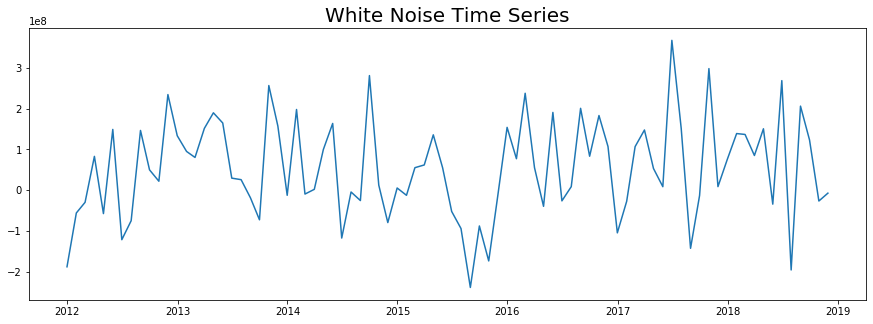

In [28]:
# Visualise the white noise value
plt.figure(figsize=(15,5))
plt.plot(data.index, data['wn'])
plt.title('White Noise Time Series', size= 20)
plt.show()

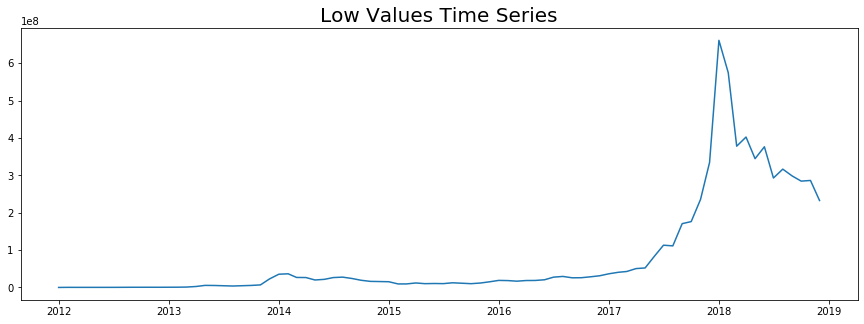

In [29]:
# Visualise the Low value
plt.figure(figsize=(15,5))
plt.plot(data.index, data['Low'])
plt.title('Low Values Time Series', size= 20)
plt.show()

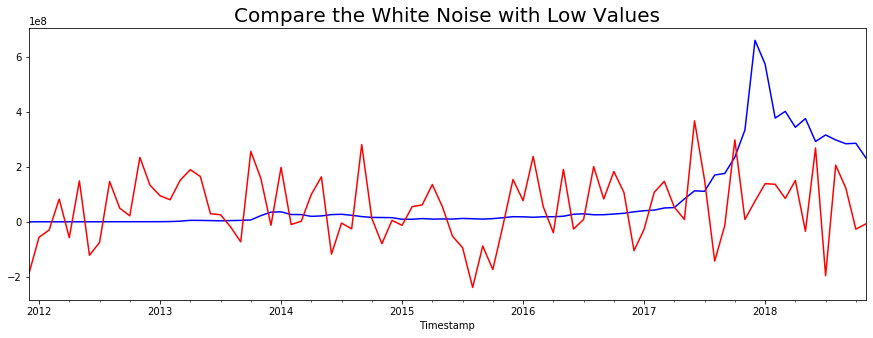

In [30]:
# Visualise both column

plt.figure(figsize=(15,5))
data['Low'].plot(color= 'blue')
data['wn'].plot(color= 'red')
plt.title('Compare the White Noise with Low Values', size=20)
plt.show()

### Identifying Stationarity in the data. 
Carrying the Dickey Test will help us sort this out.

In [31]:
from statsmodels.tsa.stattools import adfuller

print('Result from dickey-test')
dickeytest = adfuller(data['Low'], autolag='AIC')

dickeytest_output = pd.Series(dickeytest[0:4], index=['Test Statistics', 'P-Value', '#Lags Used', '# of Observations Used'])

for key,value in dickeytest[4].items():
    dickeytest_output['Critical value (%s)' %key] = value
    
print(dickeytest_output)

Result from dickey-test
Test Statistics           -1.435954
P-Value                    0.564923
#Lags Used                 0.000000
# of Observations Used    83.000000
Critical value (1%)       -3.511712
Critical value (5%)       -2.897048
Critical value (10%)      -2.585713
dtype: float64


Based on the P-value, there is more than 56% chance that the data comes from a non stationary process with zero lags, which is abit OK. But Lets check the white Noise data for stationarity as well.

In [32]:
print('Result from dickey-test')
dickeytest = adfuller(data['wn'], autolag='AIC')

dickeytest_output = pd.Series(dickeytest[0:4], index=['Test Statistics', 'P-Value', '#Lags Used', '# of Observations Used'])

for key,value in dickeytest[4].items():
    dickeytest_output['Critical value (%s)' %key] = value
    
print(dickeytest_output)

Result from dickey-test
Test Statistics          -8.810267e+00
P-Value                   2.000118e-14
#Lags Used                0.000000e+00
# of Observations Used    8.300000e+01
Critical value (1%)      -3.511712e+00
Critical value (5%)      -2.897048e+00
Critical value (10%)     -2.585713e+00
dtype: float64


The P-value here is pretty Low which signifies a better stationarity data process

### Decomposition

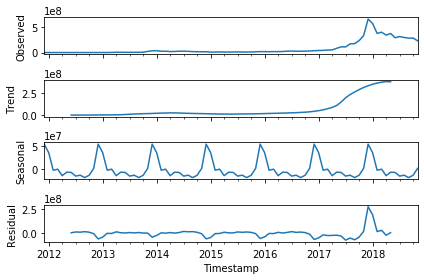

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Using the Additive method
sec_dec_additive = seasonal_decompose(data['Low'], model='additive')


sec_dec_additive.plot()
plt.show()

There is no seasonality since there is no concrete cyclic pttern. Since the trend follows the actual data closely, we will look at the correlations between past and present values.

### Autocorrelation

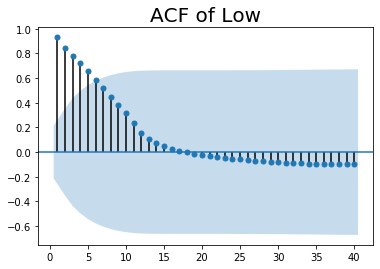

In [34]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Low'], lags = 40, zero = False)
plt.title('ACF of Low', size = 20)
plt.show()

we can see that as the lags increases, the coefficient decreases. We can see that only the first 7 lags are significant ie those outside the blue area. This means autocorrelation only exist within that period. This seems to suggest that only the first 7 lags can be used as good estimators

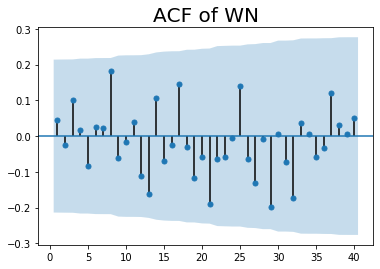

In [35]:
sgt.plot_acf(data['wn'], lags = 40, zero = False)
plt.title('ACF of WN', size = 20)
plt.show()

from the graph above, we can see that there are no autocorrelation at all since all the coefficient are within the blue area.

### Partial Autocorrelation (PACF)

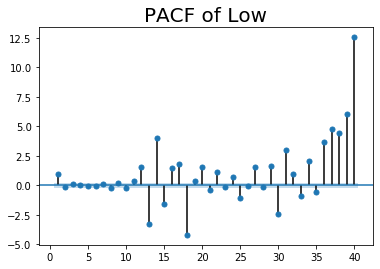

In [38]:
sgt.plot_pacf(data['Low'], lags = 40, zero = False, method = ('ols'))
plt.title('PACF of Low', size = 20)
plt.show()